## Deeper CNN
- 2021년 AlexNet이 제안되기 이전의 뉴럴 네트워크는 대부분 레이어가 몇 개 없는 얕은 구조
- 장점
    - 더 많은 feature extraction 연산
    - 더 많은 비선형 활성 함수
    - 이미지와 같은 복잡한 데이터의 추상적인 표현 캐치 가능
- 단점
    - Parameter의 숫자가 많아지면서 gradient descent를 통한 학습과정이 까다로워짐
    - Overfitting 발생 가능성이 올라감. Function의 degree가 올라가면서 더 구불구불하고 training data에만 맞는 function이 될 확률이 높음

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Input
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# (n, 28, 28) -> (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [7]:
# Basic CNN
def basic_cnn():
    model = Sequential()
    # input_shape (28, 28, 1)
    model.add(Conv2D(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters=50, kernel_size=(3, 3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [8]:
model = basic_cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                490050    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
________________________________________________

In [11]:
%time
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=100, verbose=0)

# user time : CPU가 user 코드 실행에 걸린 시간
# system time : CPU가 OS kernel 실행에 걸린 시간
# wall time : 실제 프로그램 수행에 걸린 시간(CPU가 병렬 처리인 경우 CPU time 보다 wall time이 적어진다.)

Wall time: 0 ns


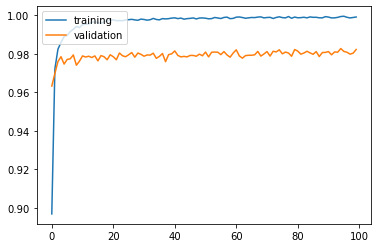

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [13]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1]

SyntaxError: unexpected EOF while parsing (<ipython-input-13-6458ff1b7520>, line 2)

In [ ]:
# Deep CNN
def deep_cnn():
    model = Sequential()
    # input_shape (28, 28, 1)
    model.add(Conv2D(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters=50, kernel_size=(3, 3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filter=50, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filter=50, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filter=50, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [ ]:
model = deep_cnn()
model.summary()

In [ ]:
%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 50, verbose = 0)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1]

In [ ]:
# Deep improved Model
from tensorflow.keras.layers import BatchNormalization, Dropout

def deep_improved_cnn():
    model = Sequential()
    # input_shape (28, 28, 1)
    model.add(Conv2D(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters=50, kernel_size=(3, 3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filter=50, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filter=25, kernel_size=(1, 1), strides=(1, 1), padding="valid", kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filter=50, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filter=25, kernel_size=(1, 1), strides=(1, 1), padding="valid", kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filter=50, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filter=25, kernel_size=(1, 1), strides=(1, 1), padding="valid", kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [ ]:
model = deep_improved_cnn()
model.summary()

In [ ]:
%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 30, verbose = 1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

### NIN(Network in Network)
- CNN에서 파라미터 개수를 줄임.
- NIN은 1 * 1 convolution이라고 함.
- convolution layer 다음에 pooling layer 대신 convolution layer를 연속해서 쌓음
- input dimension(depth, channel)을 축소, parameter 갯수 감수
- GoogleNet에서 사용됨.
- 두번째 Conv2D에서 부터 사용.